# Titre du brief

## Import des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Importation du crédit immo

### CSV

In [4]:
cd_immo = pd.read_csv("./base_donnees/credit_immo/credit_immo.csv")

cd_immo.head() # afficher les 5 premières lignes

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON


### XLS

In [6]:
cd_immo_excel = pd.read_excel("./base_donnees/credit_immo/credit_immo.xls")

cd_immo_excel.head()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON


###  JSON

In [8]:
cd_immo_json = pd.read_json("./base_donnees/credit_immo/credit_immo.json")

cd_immo_json.head()

,Salaire,ID_NOM,dette_anterieure,apport,contrat_de_travail,enfant_a_Charge,etat_civile,Solvable,age,Niv_Etude_Bac
0,40000,jean,4000,0.3,CDI,3,M,OUI,45,3
1,30500,VANESSA,1320,0.1,CDI,0,M,OUI,28,5
2,28000,TARCISSE,40000,0.0,CDI,0,C,NON,55,0
3,15000,TIBAULT,0,0.1,CDD,,M,OUI,23,4
4,27000,GILES,3000,0.1,CDD,2,C,NON,33,0


## Création d'une base de données

In [12]:
data_bd = np.random.randn(6, 4) # données aléatoire suivant une loi normal sur 6 lignes et 4 colonnes

print(base_donnees)

[[-0.19829863  0.66865447 -0.23974995  0.58064301]
 [ 0.80160499 -2.32222218  0.70982213  0.24540255]
 [-1.26380722 -1.34518062  0.90816214  0.38381157]
 [-0.02982508  0.28800181  0.58043331 -2.62944956]
 [ 0.18608506 -0.97887285  0.26542842 -0.92783916]
 [-1.07174923  0.16616469 -1.30625074 -0.01433893]]


In [13]:
label_col = ["taux_de_ventes", "croissance_vente", "ratio_benefice", "ratio_perte"] # nom des colonnes

In [15]:
bd = pd.DataFrame(data_bd, columns=label_col) # Création du dataframe

bd.head()

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,-0.366605,1.797635,-0.798096,0.359302
1,2.214939,-1.791941,1.094619,-0.293608
2,1.082135,-1.714837,0.569199,0.950451
3,-0.249590,0.224415,-0.525926,1.495179
4,-0.706128,-0.749850,-0.095994,0.190742


### Ajout de deux index vide

In [34]:
bd = bd.reindex([7,0,1,2,3,4,5,6]) # Ajout d'un index 7 en début de dataframe et d'un index 6 en fin de dataframe

### Localisation des données null

In [21]:
bd.isnull()

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
7,True,True,True,True
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,True,True,True,True


### Remplacement des valeurs nulles par 0

In [38]:
bd.fillna(0)

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
7,0.000000,0.000000,0.000000,0.000000
0,-0.366605,1.797635,-0.798096,0.359302
1,2.214939,-1.791941,1.094619,-0.293608
2,1.082135,-1.714837,0.569199,0.950451
3,-0.249590,0.224415,-0.525926,1.495179
4,-0.706128,-0.749850,-0.095994,0.190742
5,0.997094,-0.263894,-1.111748,-0.220468
6,0.000000,0.000000,0.000000,0.000000


### Suppression des lignes nulles

In [39]:
bd = bd.dropna()

In [40]:
bd

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,-0.366605,1.797635,-0.798096,0.359302
1,2.214939,-1.791941,1.094619,-0.293608
2,1.082135,-1.714837,0.569199,0.950451
3,-0.249590,0.224415,-0.525926,1.495179
4,-0.706128,-0.749850,-0.095994,0.190742
5,0.997094,-0.263894,-1.111748,-0.220468


## Traitement des données

### Imporation des bibliothèques nécessaires

In [42]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

### Importation du jeu de données

In [91]:
cd_immo = pd.read_csv("./base_donnees/credit_immo/credit_immo.csv")

In [92]:
cd_immo.head()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON


### Transformation des valeurs manquantes

In [93]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer = imputer.fit(cd_immo.select_dtypes(include='number'))

cd_immo[cd_immo.select_dtypes(include='number').columns] = imputer.fit_transform(cd_immo.select_dtypes(include='number'))

In [94]:
cd_immo.head()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45.0,CDI,40000.0,4000.0,M,0.3,3.000000,OUI
1,VANESSA,5.0,28.0,CDI,30500.0,1320.0,M,0.1,0.000000,OUI
2,TARCISSE,0.0,55.0,CDI,28000.0,40000.0,C,0.0,0.000000,NON
3,TIBAULT,4.0,23.0,CDD,15000.0,0.0,M,0.1,1.333333,OUI
4,GILES,0.0,33.0,CDD,27000.0,3000.0,C,0.1,2.000000,NON


### Encoder les valeurs catégoriques

In [95]:
cd_immo.select_dtypes(include='object') # sélectionner les colonnes objet 

,ID_NOM,contrat_de_travail,etat_civile,Solvable
0,jean,CDI,M,OUI
1,VANESSA,CDI,M,OUI
2,TARCISSE,CDI,C,NON
3,TIBAULT,CDD,M,OUI
4,GILES,CDD,C,NON
5,ETHAN,INTERIM,M,NON
6,LILIANE,CDI,C,NON
7,GLODI,INTERIM,C,NON
8,FLORIANE,CDI,M,OUI
9,MARIE,CDI,M,OUI


In [96]:
label_categ = cd_immo.select_dtypes(include='object').columns # récupération des noms des colonnes objet
print(label_categ)

Index(['ID_NOM', 'contrat_de_travail', 'etat_civile', 'Solvable'], dtype='object')


In [97]:
labelE = LabelEncoder() # attribution fonction LabelEncoder() à la variable labelE

In [98]:
for i in label_categ[1:]: # Boucle pour traiter les différentes colonne, car la fonction prend uniquement les arrya 1D
    cd_immo[i] = labelE.fit_transform(cd_immo[i])

In [99]:
cd_immo.head()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45.0,1,40000.0,4000.0,1,0.3,3.000000,1
1,VANESSA,5.0,28.0,1,30500.0,1320.0,1,0.1,0.000000,1
2,TARCISSE,0.0,55.0,1,28000.0,40000.0,0,0.0,0.000000,0
3,TIBAULT,4.0,23.0,0,15000.0,0.0,1,0.1,1.333333,1
4,GILES,0.0,33.0,0,27000.0,3000.0,0,0.1,2.000000,0


### Mise à l’échelle des features

In [136]:
x = StandardScaler().fit_transform(cd_immo.iloc[:,1:-1])

array([[ 0.58477783,  0.69964472, -0.16929979, -0.15939982, -0.34223088,
         0.67936622,  1.24354001,  1.32637071],
       [ 1.33663503, -0.77738303, -0.16929979, -0.61392855, -0.45846885,
         0.67936622, -0.33161067, -1.06109657],
       [-0.54300798,  1.56848458, -0.16929979, -0.73354137,  1.21917467,
        -1.47196014, -1.11918601, -1.06109657],
       [ 0.96070643, -1.21180295, -1.24153183, -1.35552804, -0.51572038,
         0.67936622, -0.33161067,  0.        ],
       [-0.54300798, -0.3429631 , -1.24153183, -0.7813865 , -0.38560325,
        -1.47196014, -0.33161067,  0.53054828],
       [-0.54300798,  0.35210878,  1.97516427, -0.15939982, -0.47234801,
         0.67936622, -1.11918601,  2.12219314],
       [-0.91893658, -0.69049904, -0.16929979,  0.31905146, -0.38560325,
        -1.47196014, -1.11918601, -1.06109657],
       [-1.67079379, -1.12491897,  1.97516427, -0.68569624, -0.2988585 ,
        -1.47196014, -1.11918601, -1.06109657],
       [ 0.        , -0.951151  

### Fractionner le jeu de données pour l’entrainement et le test

In [124]:
X_train, X_test, y_train, y_test = train_test_split(x, cd_immo["Solvable"], test_size=0.2)

In [125]:
print("Taille de X_train :", len(X_train))
print("Taille de X_test :", len(X_test))

Taille de X_train : 15
Taille de X_test : 4


## Visualisation de données

#### Chargement des données

In [138]:
data_montant = pd.read_csv("./base_donnees/Montant_Temps.csv")
data_montant.head()

,Montant_du_capitale,Temps
0,1,5
1,12,6
2,13,7
3,2,8
4,3,9


#### Séparation des données en abscisses et ordonnées

In [141]:
x = data_montant.iloc[:,1] # Valeurs d'abscisses
y = data_montant.iloc[:,0] # Valeurs d'ordonnées

#### Tracer les données

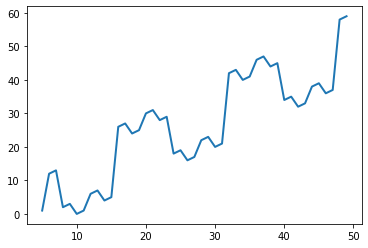

In [148]:
ax = plt.plot(x,y, linewidth=2)
plt.show()

###  Rajoutez du style à vos graphiques

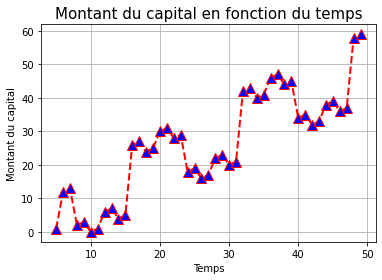

In [164]:
plt.plot(x,y, linewidth=2, color="red", linestyle = "dashed", marker="^", markersize=10, markerfacecolor="blue")
plt.title("Montant du capital en fonction du temps", fontsize=15)
plt.xlabel("Temps")
plt.ylabel("Montant du capital")
plt.grid(visible=True)
plt.show()

### Visualisation de données sous forme de nuage de points

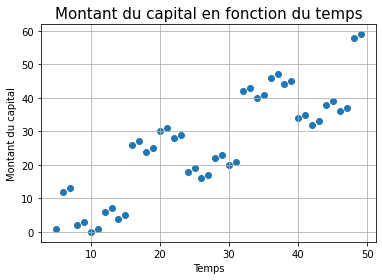

In [166]:
plt.scatter(x, y)
plt.title("Montant du capital en fonction du temps", fontsize=15)
plt.xlabel("Temps")
plt.ylabel("Montant du capital")
plt.grid(visible=True)
plt.show()

## Analyse de données

### Mesure de tendance centrale

In [167]:
data_tc = pd.read_csv("./base_donnees/tendance_centrale.csv") # Chargement des données tendance_centrale.csv

In [169]:
data_tc.head()

,Nom,Age,Rating
0,ANATOLE,55,4.53
1,Vincent,59,3.54
2,Brenda,55,3.98
3,Philippe,53,5.59
4,Michel,30,3.50


In [170]:
data_tc.describe() # Analyse descriptive du jeu de données tendance centrale

,Age,Rating
count,17.000000,17.000000
mean,45.647059,4.438824
std,10.723462,0.800390
min,30.000000,3.500000
25%,34.000000,3.800000
50%,49.000000,4.300000
75%,53.000000,4.800000
max,59.000000,5.980000


In [173]:
data_tc.mode() # Calcul des modes (les valeurs les plus fréquente) du jeu de données

,Nom,Age,Rating
0,perez,53.0,3.78
1,NaN,NaN,3.95
2,NaN,NaN,4.30
3,NaN,NaN,4.80
4,NaN,NaN,5.98


### Analyse de la variance

On cherche ici a vérifier si le nom de la personne ou son age a un impact sur le rating. Affichons dans un premier temps le *boxplot* des noms en fonction du ration, suivi de celui de l'age en fonction du rating.

In [174]:
data_tc

,Nom,Age,Rating
0,ANATOLE,55,4.53
1,Vincent,59,3.54
2,Brenda,55,3.98
3,Philippe,53,5.59
4,Michel,30,3.50
5,Tillier,59,4.90
6,Blanchard,53,3.80
7,perez,34,3.78
8,théo,40,5.98
9,cyprien,30,4.80


### Analyse de corrélations

####  ??

#### Analyse graphique 

#### Analyse mathématique